In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
display(customer_df.shape)
display(customer_df.info())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

In [3]:
cols1 = []
for column in customer_df.columns:
    new_column_name = column.replace(' ', '_')
    cols1.append(new_column_name)
customer_df.columns = cols1
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [4]:
customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])
customer_df['Effective_To_Date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: Effective_To_Date, Length: 9134, dtype: datetime64[ns]

In [5]:
customer_df.isna().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [6]:
def grouping(row):
    categoricals = row.select_dtypes('object')
    numericals = row._get_numeric_data()
    discrete = []
    continuous = []
    for column in numericals.columns:
        if numericals[column].nunique() < 20:
            discrete.append(column)
        else:
            continuous.append(column)
    discrete1 = row[discrete]
    continuous1 = row[continuous]
    return categoricals, discrete1, continuous1

In [7]:
#The function 'grouping' is a function which groups the columns in 3 different categories
#First I group categoricals
#Then I group int into discrete because It can't have all values between the first and the second

In [8]:
categoricals, discrete, continuous = grouping(customer_df)

In [9]:
display(categoricals)
display(discrete)
display(continuous)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [10]:
#I can delete de customer id column because it's useless

In [11]:
categoricals = categoricals.drop(['Customer'], axis=1)
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [12]:
for column in categoricals:
    print(categoricals[column].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
['Offer1' 'Offer3' 'Offer2' 'Offer4']
['Agent' 'Call Center' 'Web' 'Branch']
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
['Medsize' 'Small' 'Large']


In [13]:
for i in range(len(categoricals['Vehicle_Size'])):
    if categoricals['Vehicle_Size'][i] == 'Medsize':
        categoricals['Vehicle_Size'][i] = 'Midsize'
categoricals['Vehicle_Size']

0       Midsize
1       Midsize
2       Midsize
3       Midsize
4       Midsize
         ...   
9129    Midsize
9130    Midsize
9131    Midsize
9132      Large
9133    Midsize
Name: Vehicle_Size, Length: 9134, dtype: object

In [14]:
# LAB 2

In [15]:
numericals = pd.concat([discrete, continuous], axis= 1)

In [16]:
correlations_matrix = numericals.corr()
correlations_matrix

,Number_of_Open_Complaints,Number_of_Policies,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
Number_of_Open_Complaints,1.000000,0.001498,-0.036343,0.006408,-0.013122,0.005354,-0.001158,-0.014241
Number_of_Policies,0.001498,1.000000,0.021955,-0.008656,-0.011233,0.009136,-0.013333,-0.002354
Customer_Lifetime_Value,-0.036343,0.021955,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.006408,-0.008656,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly_Premium_Auto,-0.013122,-0.011233,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months_Since_Last_Claim,0.005354,0.009136,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months_Since_Policy_Inception,-0.001158,-0.013333,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total_Claim_Amount,-0.014241,-0.002354,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


In [17]:
# They aren't correlative at all

In [18]:
def discrete_plots(row):
    for column in row.columns:
        sns.displot(row[column])
        plots = plt.show() 
    return plots

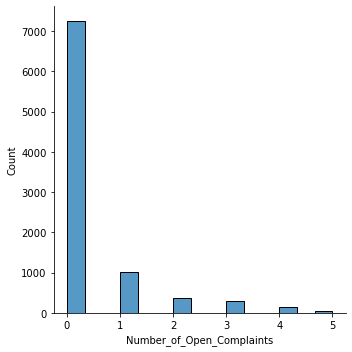

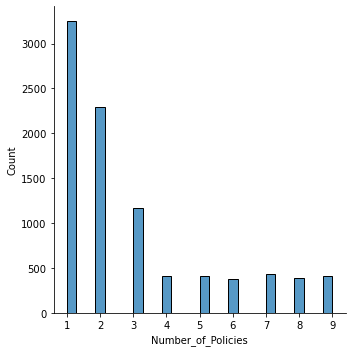

In [19]:
discrete_plots(discrete)

In [20]:
def continuous_plots(row):
    for column in row.columns:
        row[[column]].boxplot()
        plots = plt.show()
    return plots

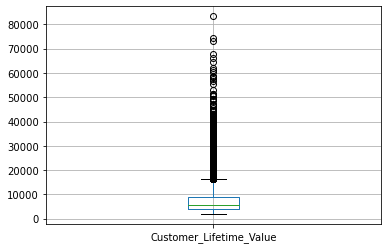

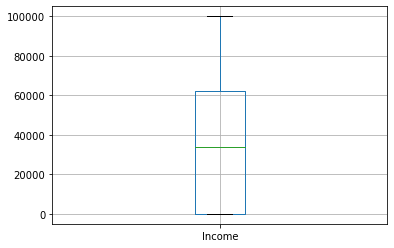

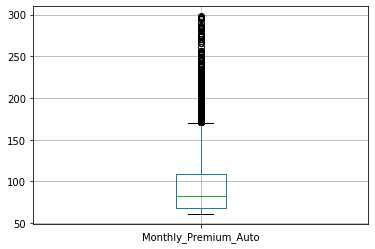

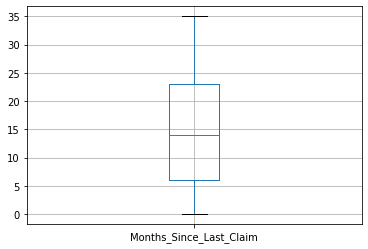

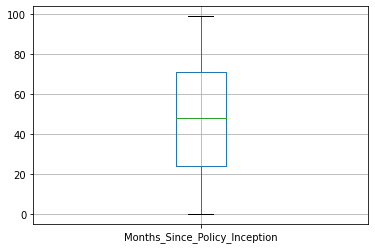

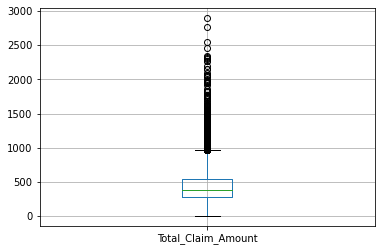

In [21]:
continuous_plots(continuous)

In [22]:
# I can see a lot of ouliers in some of the continuous variables

In [23]:
# I can use log transformation to reduce the number of outliers

In [24]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [25]:
outliers = continuous[['Customer_Lifetime_Value','Monthly_Premium_Auto', 'Total_Claim_Amount']]

In [26]:
for column in outliers:
    pd.Series(continuous[column].apply(log_transfom_clean))

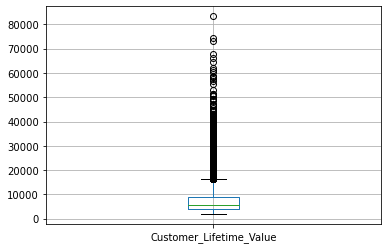

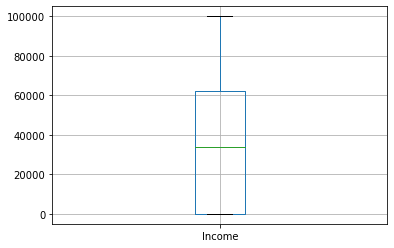

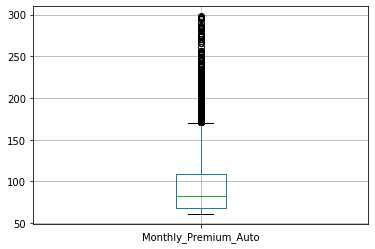

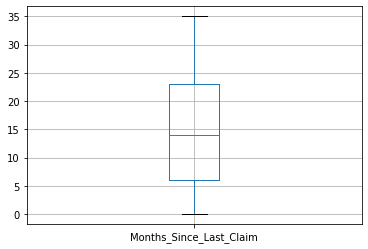

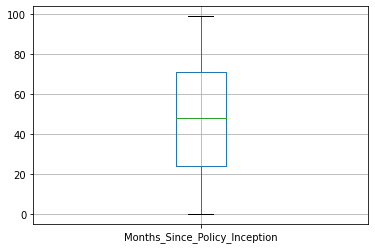

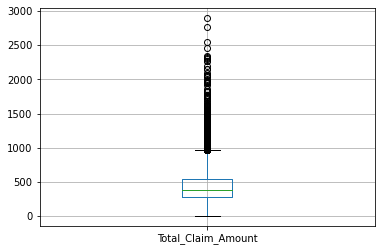

In [27]:
continuous_plots(continuous)

In [30]:
def categorical_plots(row):
    f , axes = plt.subplots(int(categoricals.shape[1]/2),2, figsize =(30,50))
    for i, col in enumerate(categoricals):
        sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
        axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
        axes[int(i/2)][int(i)%2].set_ylabel('')
    return axes

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

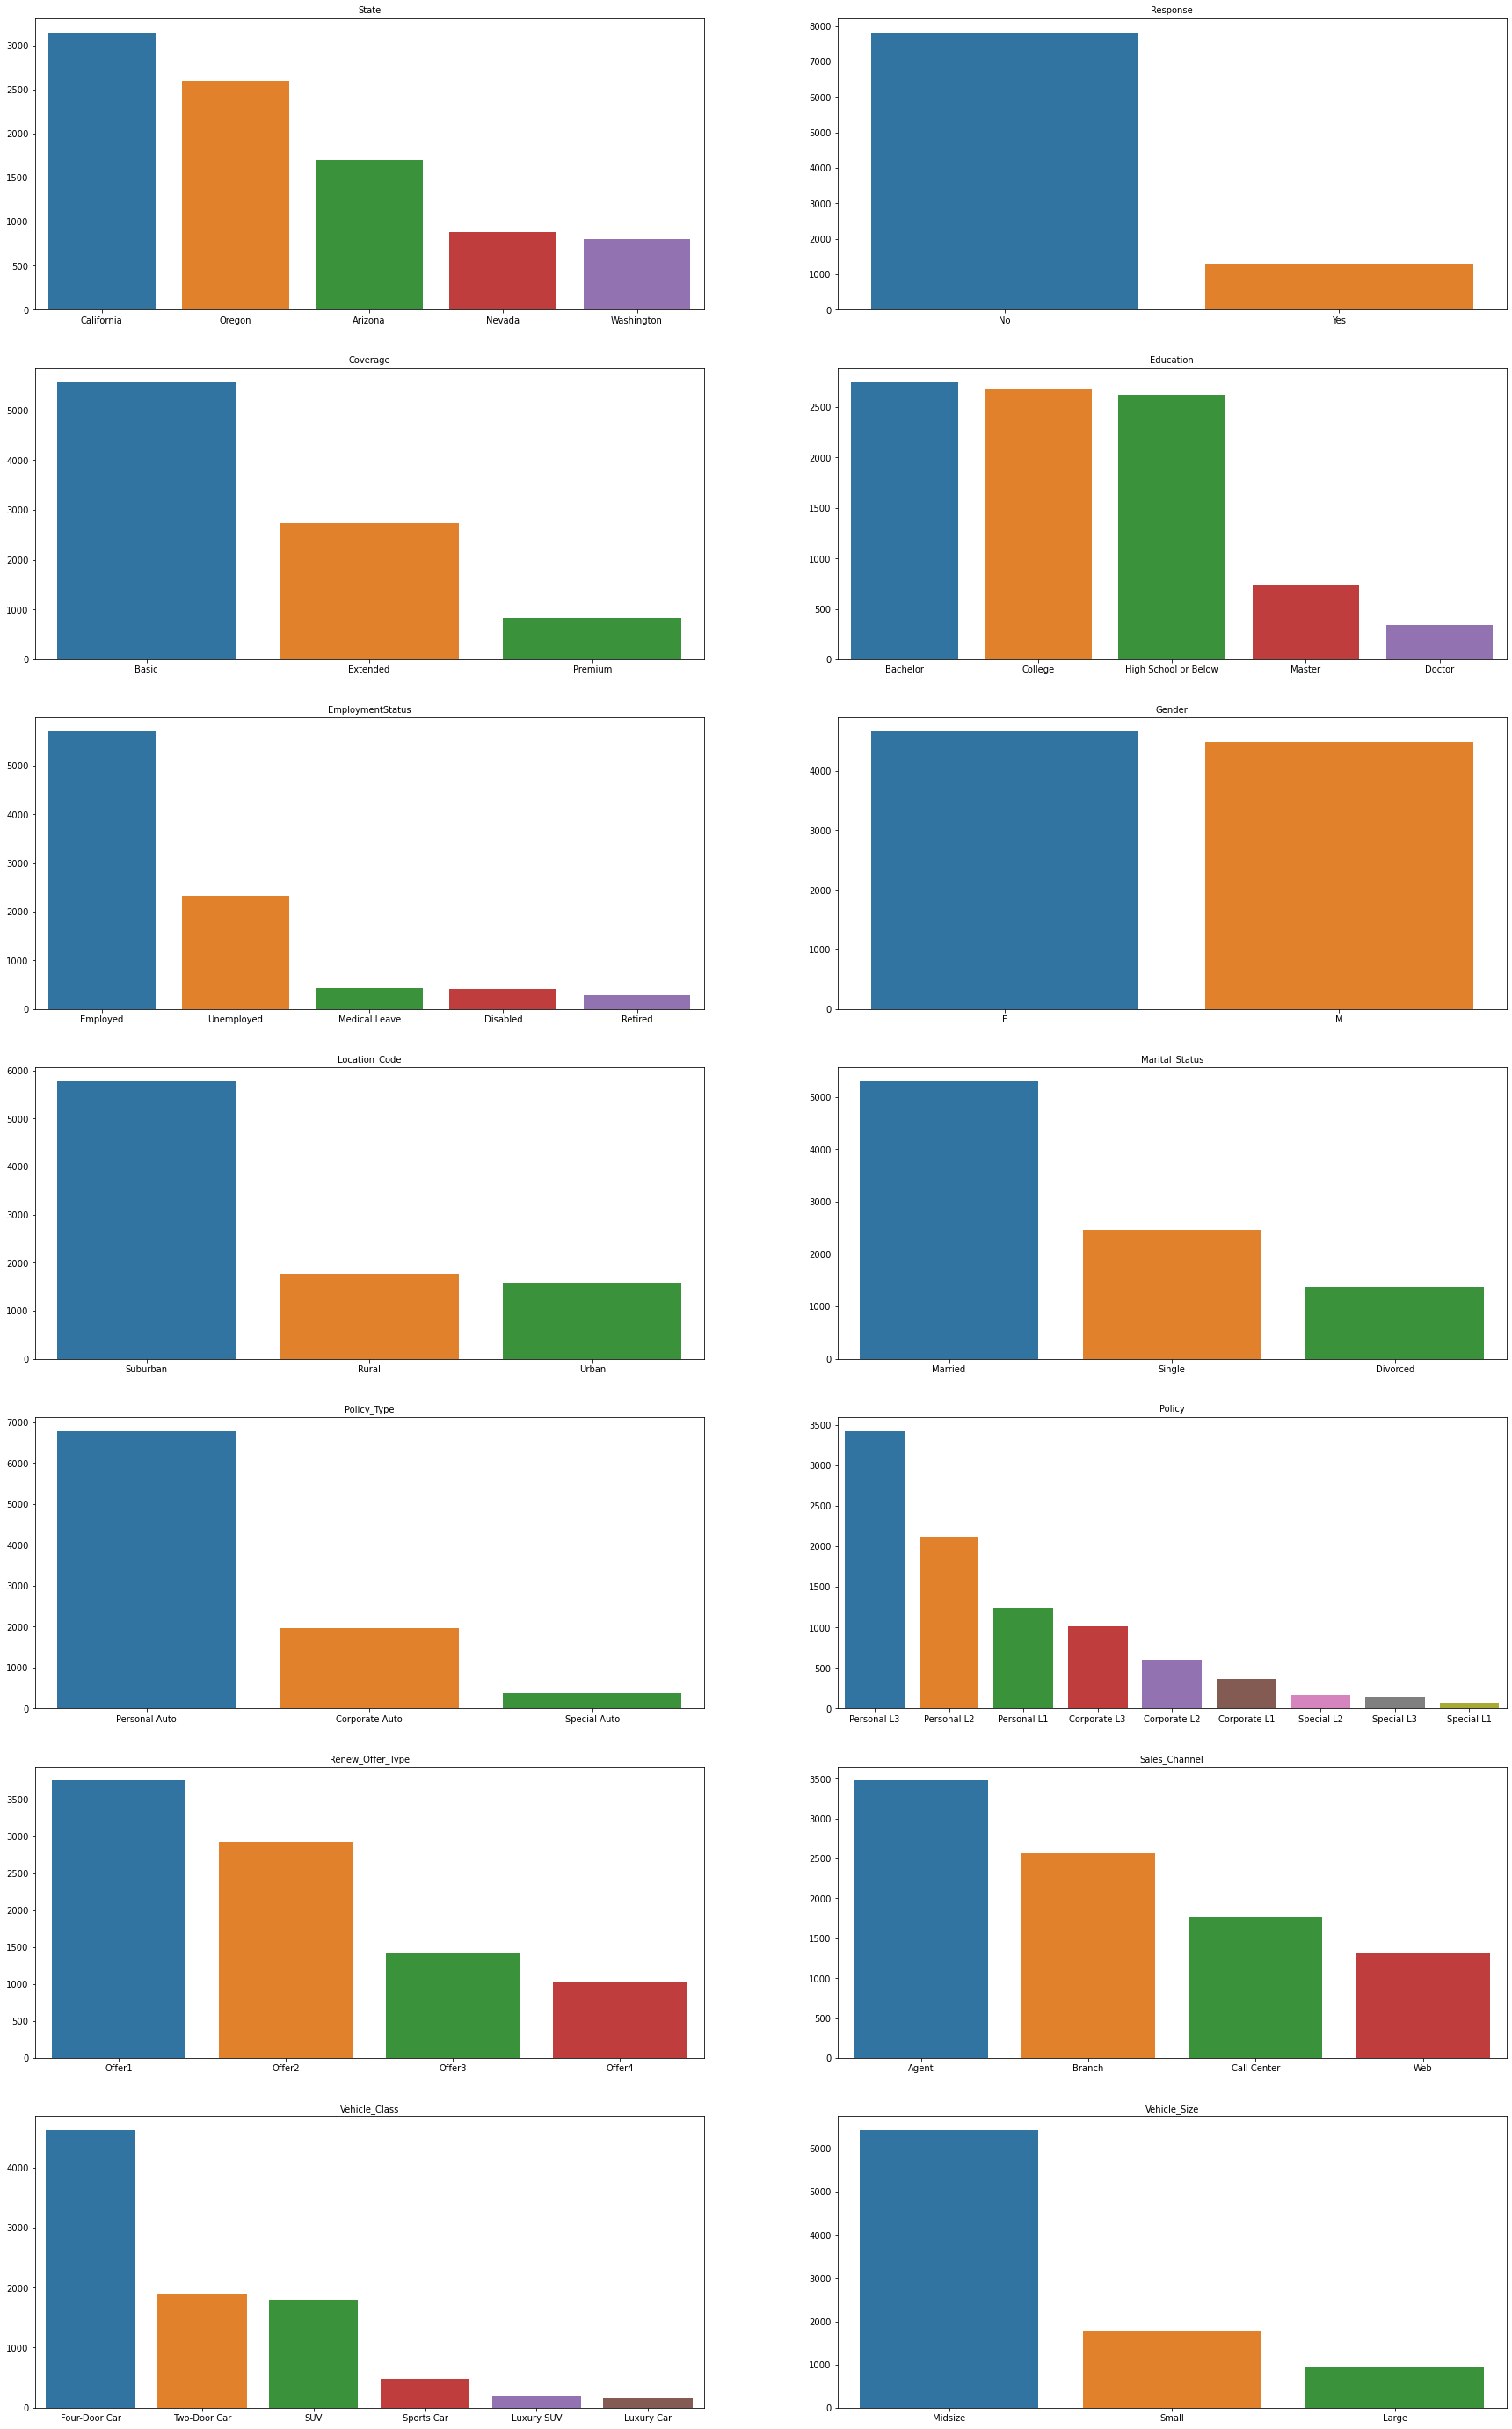

In [31]:
categorical_plots(categoricals)

In [32]:
# Most of categorical are or unbalanced or they have many variables inside, I must change it

In [33]:
def clean_categorical(row):
    # In State i'm going to group Nev y Wash into 'Other'
    row['State'] = row['State'].replace(['Nevada','Washington'], 'Other')
    # In EmploymentStatus I can create a new group 'Not Active'
    row['EmploymentStatus'] = row['EmploymentStatus'].replace(['Medical Leave','Disabled', 'Retired'], 'Not_Active')
    # In Policy I can group in L1, L2, L3
    for i in range(len(row['Policy'])):
        if row['Policy'][i].count('L1') >= 1:
            row['Policy'][i] = 'L1'
        elif row['Policy'][i].count('L2') >= 1:
            row['Policy'][i] = 'L2'
        elif row['Policy'][i].count('L3') >= 1:
            row['Policy'][i] = 'L3'
    # I Vehicle Class I can group the last 3 in one called Other_types
    row['Vehicle_Class'] = row['Vehicle_Class'].replace(['Luxury Car','Luxury SUV', 'Sports Car'], 'Other_types')
    return row

In [34]:
clean_categorical = clean_categorical(categoricals)

array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

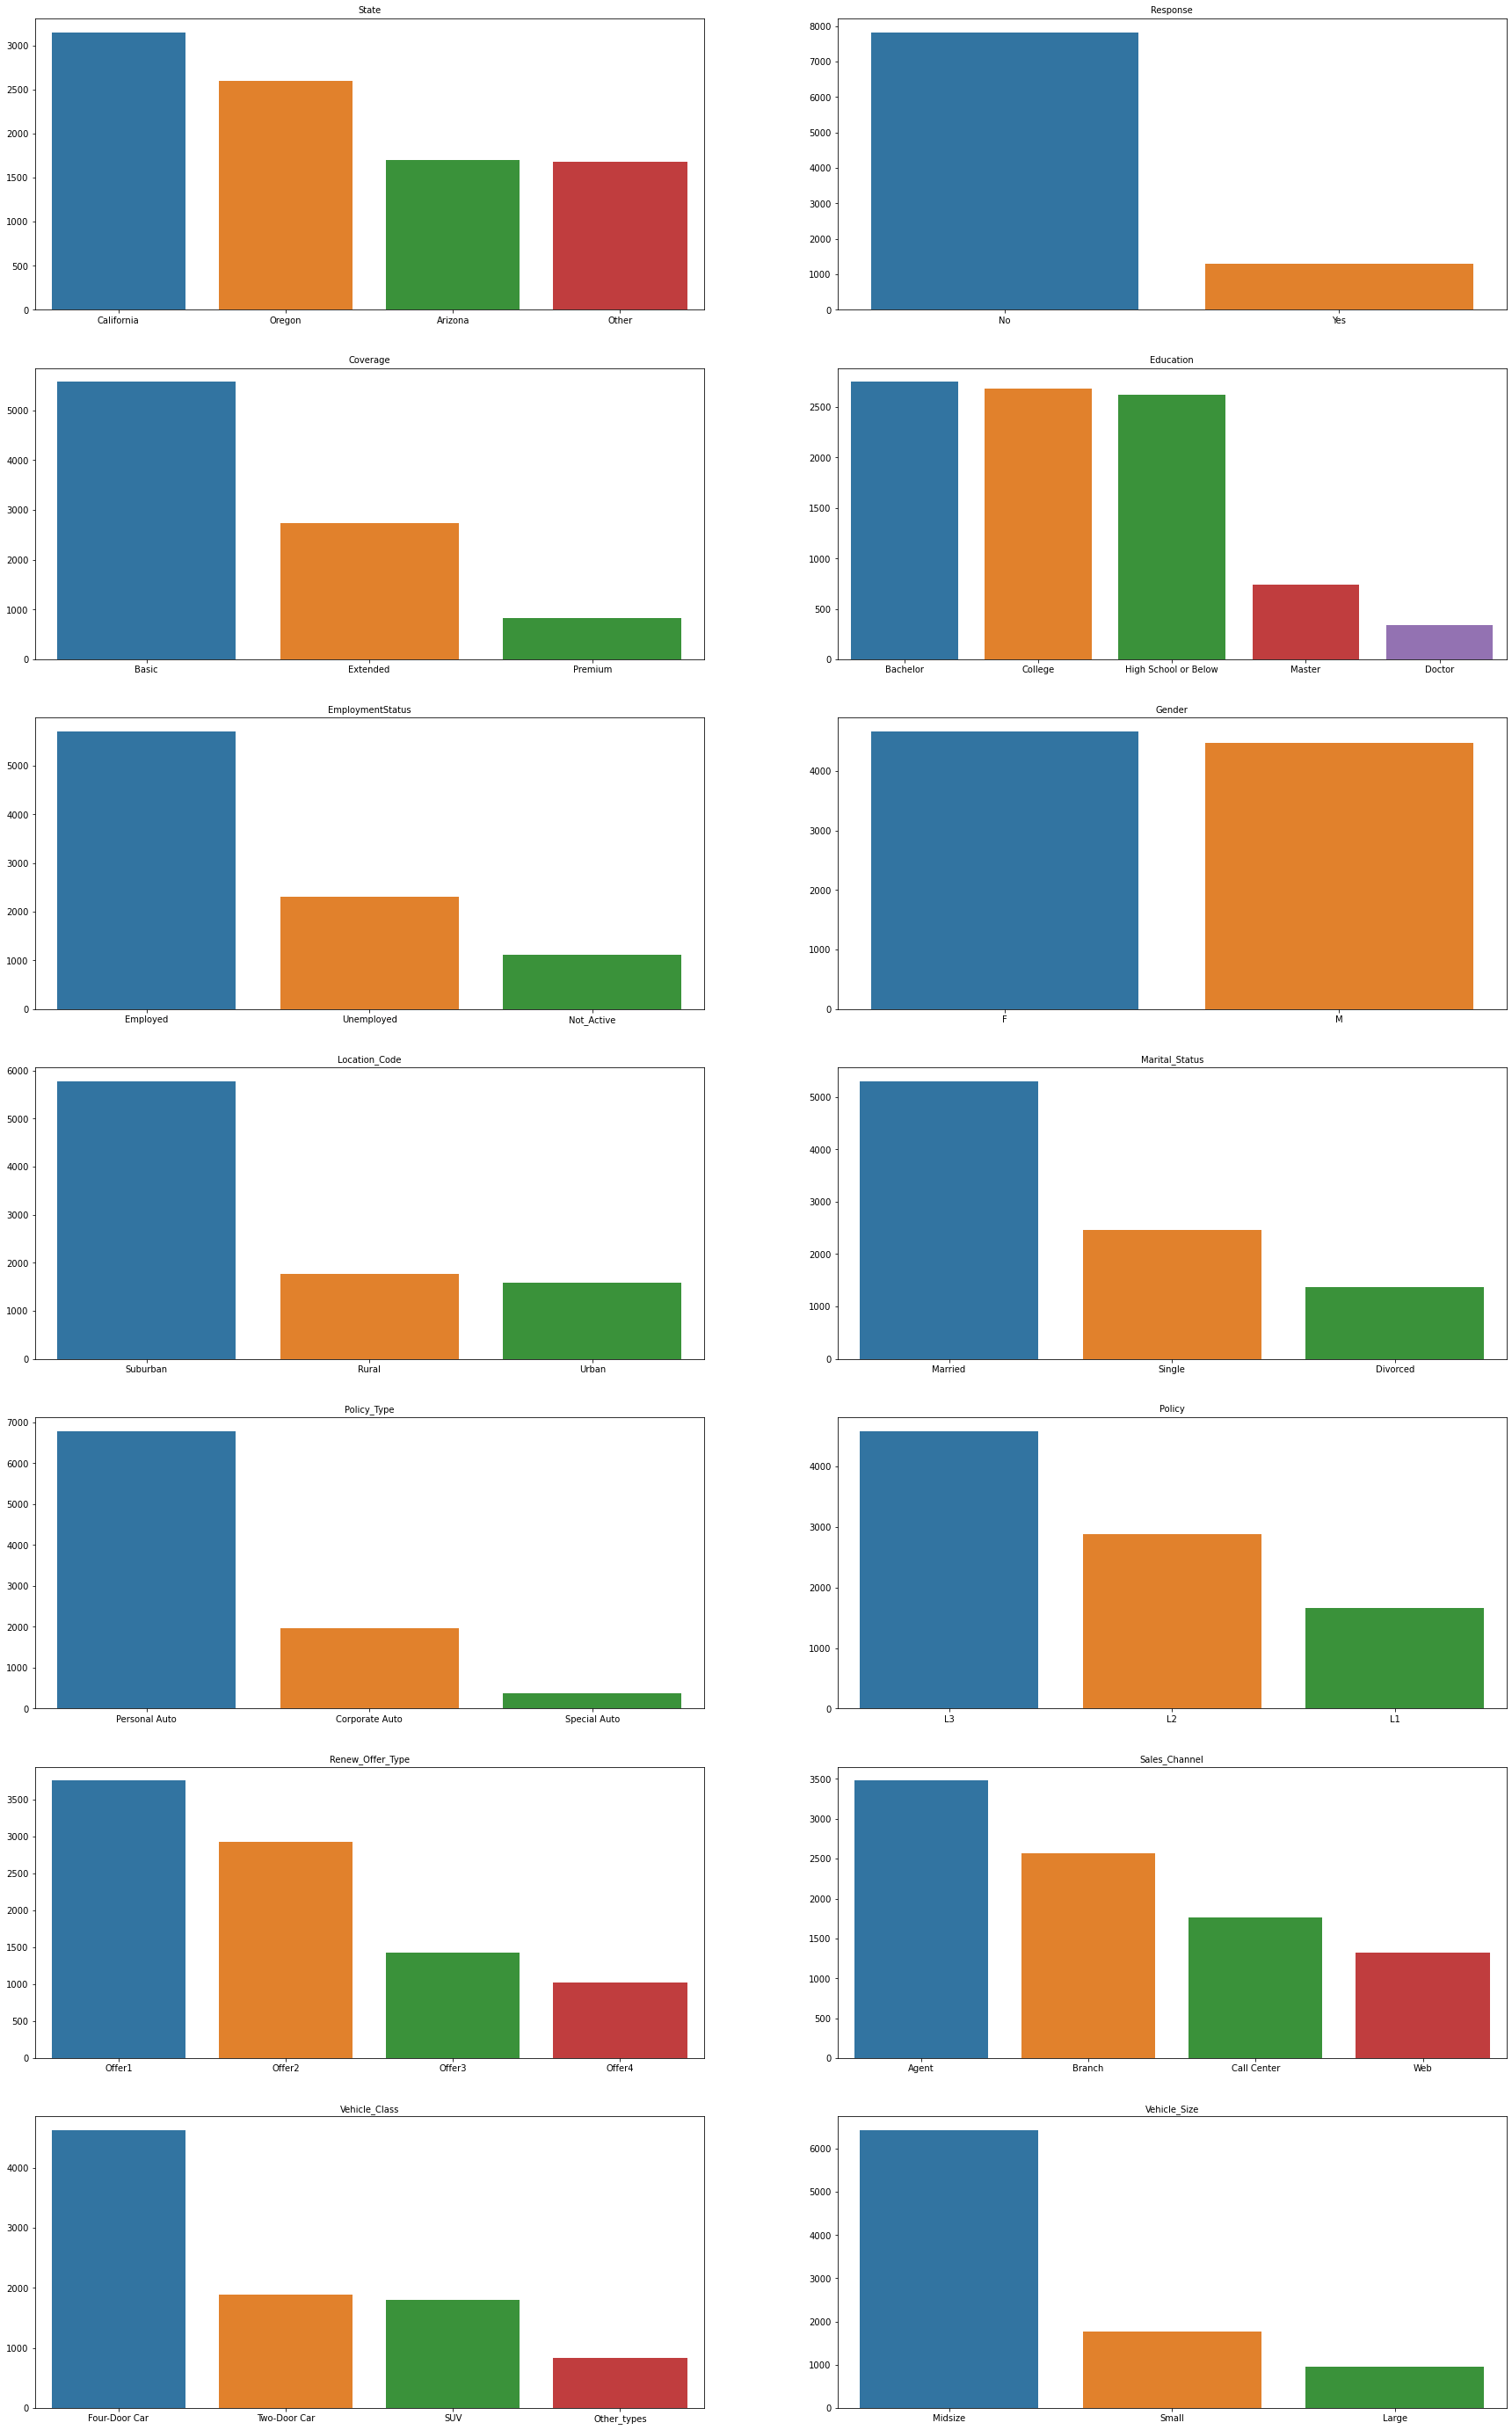

In [35]:
categorical_plots(clean_categorical)

In [ ]:
# And the same for other numerical variables, there are many I can group or change to be better agroupped

In [36]:
discrete

,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [37]:
display(discrete['Number_of_Open_Complaints'].value_counts())
display(discrete['Number_of_Policies'].value_counts())

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number_of_Open_Complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: Number_of_Policies, dtype: int64

In [38]:
# I can group the first in open or not opend, and the second in 1, 2, 3, 4, or more than 4

In [39]:
def clean_discrete(row):
    row.rename(columns={'Number_of_Open_Complaints':'2'}, inplace=True)
    row['Open_Complaints'] = row['2']
    row['Open_Complaints'] = str(row['Open_Complaints'])
    for i in range(len(discrete['2'])):
        if row['2'][i] > 0:
            row['Open_Complaints'][i] = 'Open Complains'
        else:
            row['Open_Complaints'][i] = 'Not Open Complains'
    row.rename(columns={'Number_of_Policies':'1'}, inplace=True)
    row['Number_of_Policies'] = row['1']
    row['Number_of_Policies'] = str(row['Number_of_Policies'])
    for i in range(len(discrete['Number_of_Policies'])):
        if row['1'][i] >= 4:
            row['Number_of_Policies'][i] = '4+'
        else:
            row['Number_of_Policies'][i] = row['1'][i]
    row = row.drop(['1','2'], axis =1)
    return row

In [40]:
clean_discrete = clean_discrete(discrete)
clean_discrete

C:\Users\Propietario\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-39-aa6d2796cf42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['Open_Complaints'] = row['2']
<ipython-input-39-aa6d2796cf42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,Open_Complaints,Number_of_Policies
0,Not Open Complains,1
1,Not Open Complains,4+
2,Not Open Complains,2
3,Not Open Complains,4+
4,Not Open Complains,1
...,...,...
9129,Not Open Complains,2
9130,Not Open Complains,1
9131,Open Complains,2
9132,Not Open Complains,3


In [41]:
display(clean_discrete['Open_Complaints'].value_counts())
display(clean_discrete['Number_of_Policies'].value_counts())

Not Open Complains    7252
Open Complains        1882
Name: Open_Complaints, dtype: int64

1     3251
4+    2421
2     2294
3     1168
Name: Number_of_Policies, dtype: int64

In [ ]:
# LAB FEATURE EXTRACTION

In [44]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Midsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Midsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


In [59]:
clean_categorical

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Other,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,L3,Offer1,Agent,Two-Door Car,Midsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,L3,Offer3,Agent,Four-Door Car,Midsize
2,Other,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Midsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,L2,Offer1,Call Center,SUV,Midsize
4,Other,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,L1,Offer1,Agent,Four-Door Car,Midsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,L1,Offer2,Web,Four-Door Car,Midsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,L3,Offer1,Branch,Four-Door Car,Midsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,L2,Offer1,Branch,Four-Door Car,Midsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,L2,Offer3,Branch,Four-Door Car,Large


array([[<AxesSubplot:title={'center':'State'}>,
        <AxesSubplot:title={'center':'Response'}>],
       [<AxesSubplot:title={'center':'Coverage'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmploymentStatus'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'Location_Code'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Policy_Type'}>,
        <AxesSubplot:title={'center':'Policy'}>],
       [<AxesSubplot:title={'center':'Renew_Offer_Type'}>,
        <AxesSubplot:title={'center':'Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vehicle_Class'}>,
        <AxesSubplot:title={'center':'Vehicle_Size'}>]], dtype=object)

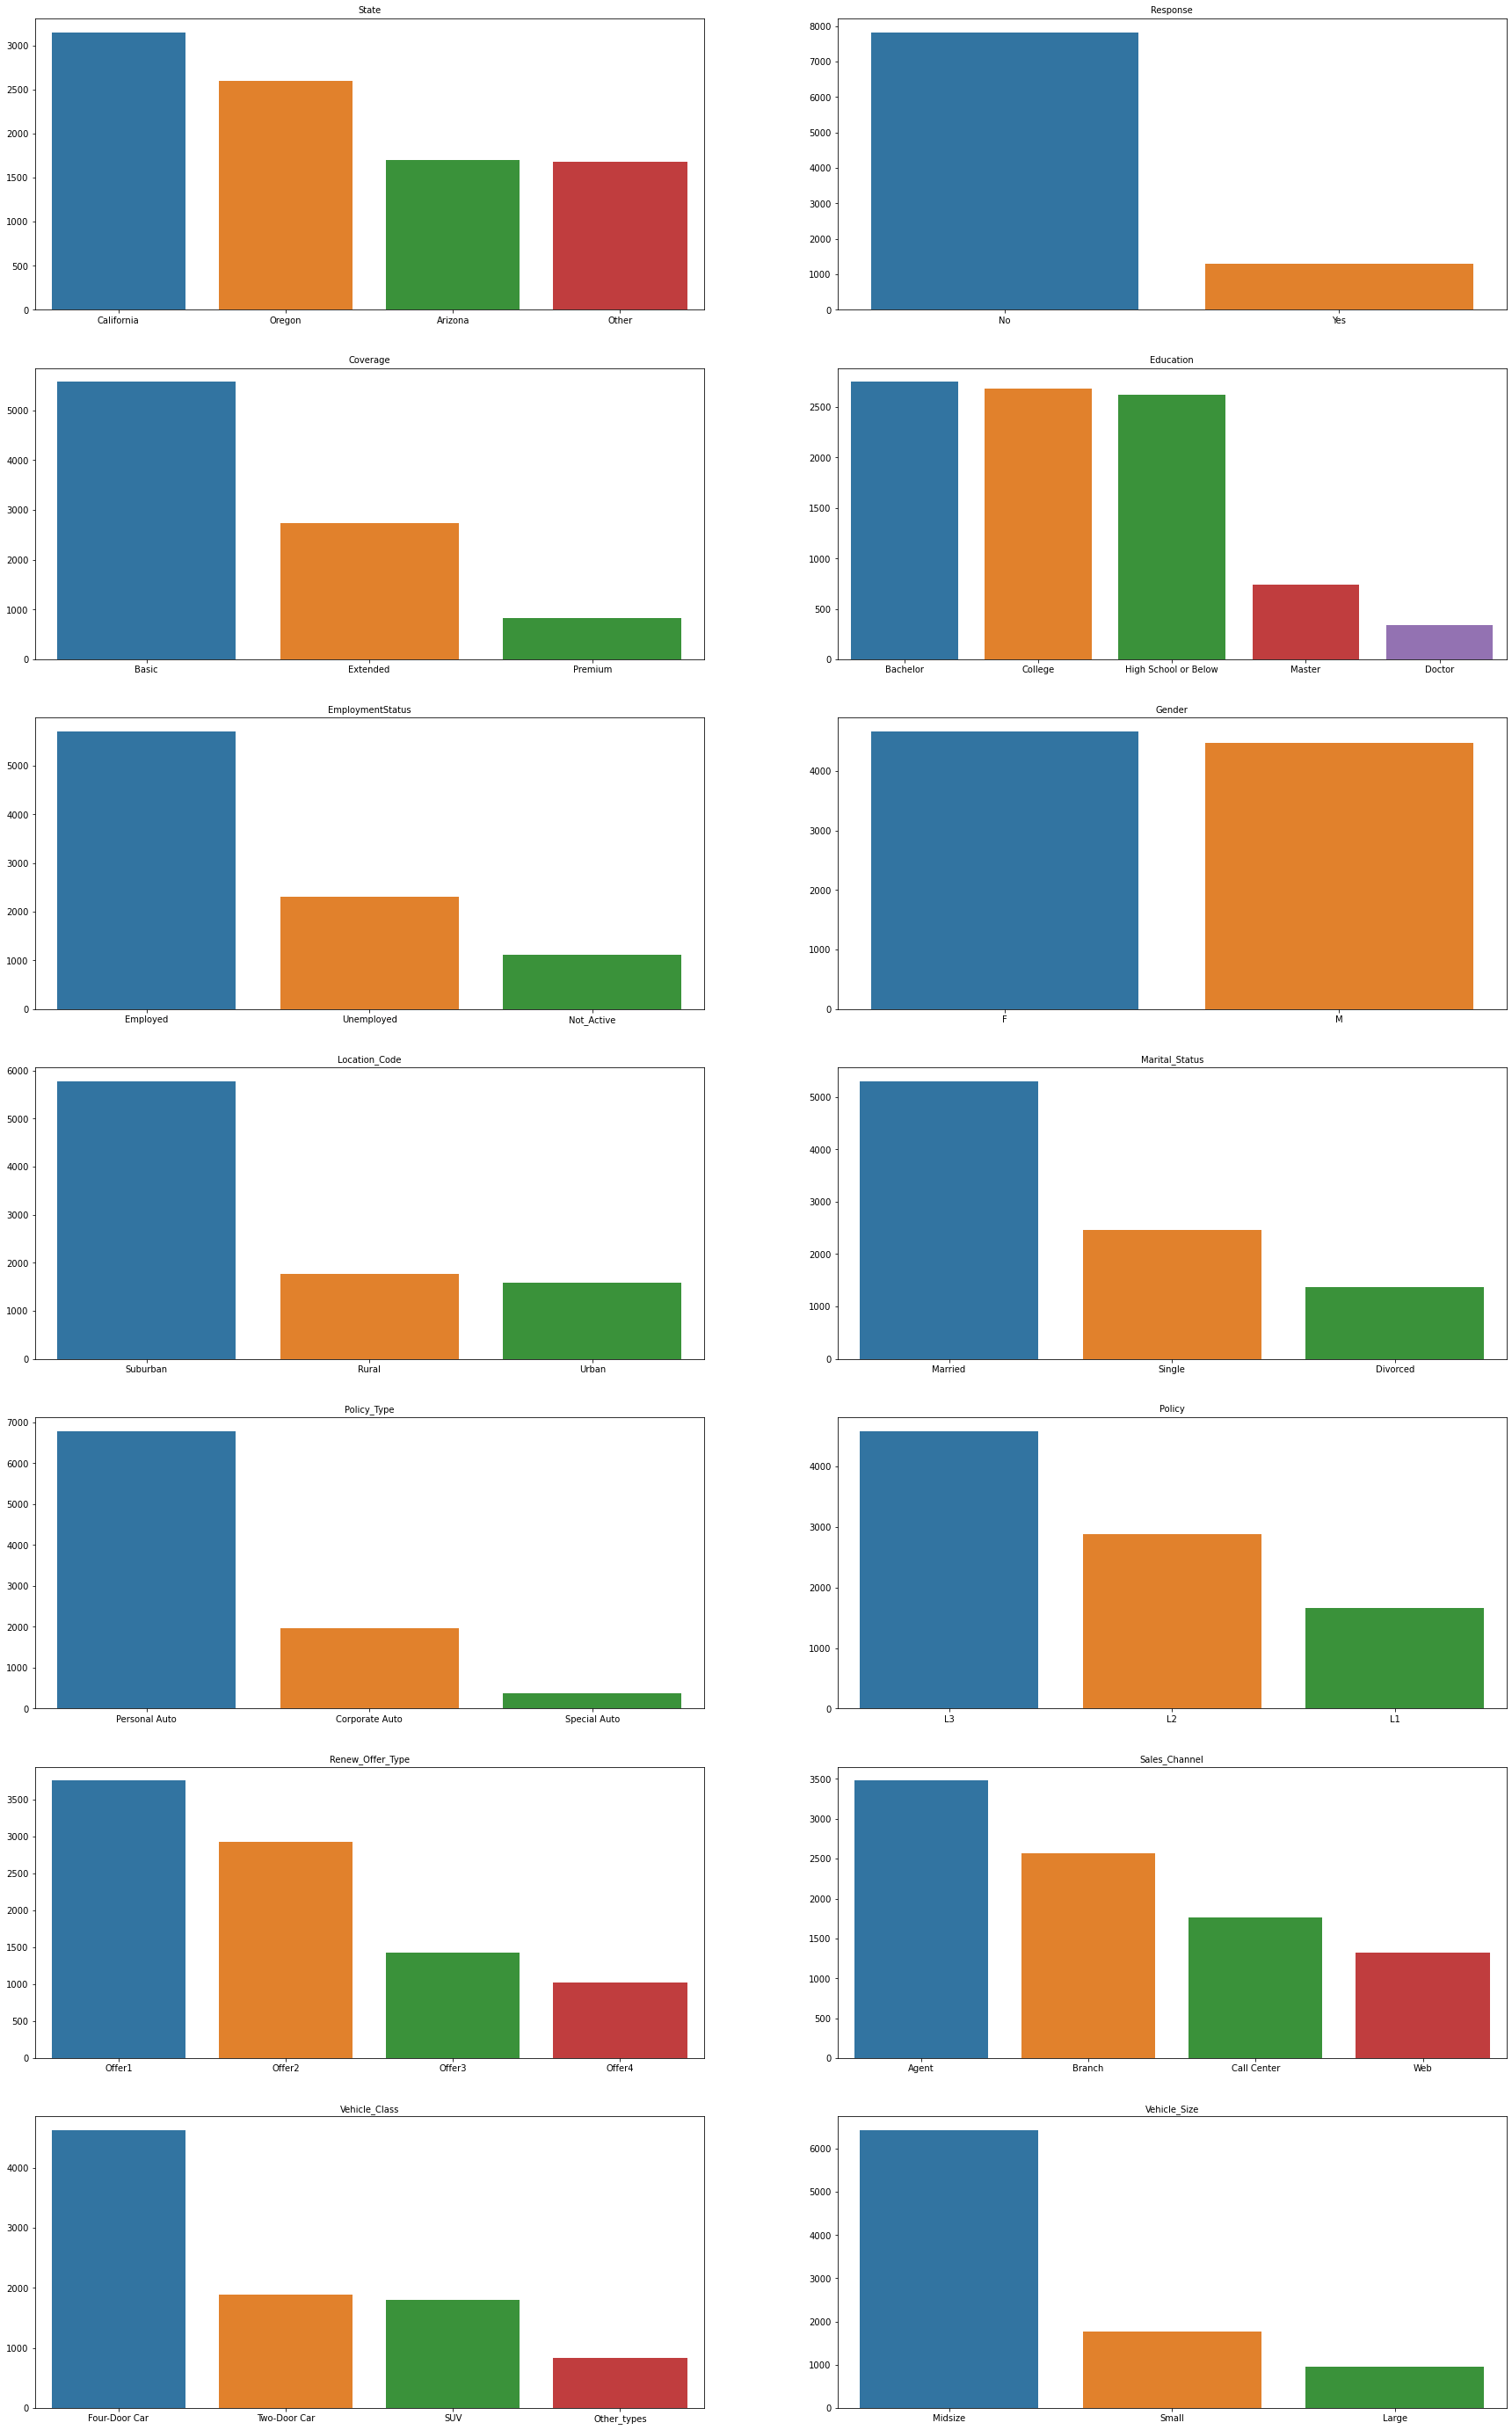

In [58]:
categorical_plots(clean_categorical)

In [60]:
# I can see some variables with similar distribution, and a lot of variables very unbalanced.

In [62]:
corr_matrix1 = numericals.corr()
corr_matrix1

,Number_of_Open_Complaints,Number_of_Policies,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
Number_of_Open_Complaints,1.000000,0.001498,-0.036343,0.006408,-0.013122,0.005354,-0.001158,-0.014241
Number_of_Policies,0.001498,1.000000,0.021955,-0.008656,-0.011233,0.009136,-0.013333,-0.002354
Customer_Lifetime_Value,-0.036343,0.021955,1.000000,0.024366,0.396262,0.011517,0.009418,0.226451
Income,0.006408,-0.008656,0.024366,1.000000,-0.016665,-0.026715,-0.000875,-0.355254
Monthly_Premium_Auto,-0.013122,-0.011233,0.396262,-0.016665,1.000000,0.005026,0.020257,0.632017
Months_Since_Last_Claim,0.005354,0.009136,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.007563
Months_Since_Policy_Inception,-0.001158,-0.013333,0.009418,-0.000875,0.020257,-0.042959,1.000000,0.003335
Total_Claim_Amount,-0.014241,-0.002354,0.226451,-0.355254,0.632017,0.007563,0.003335,1.000000


In [63]:
corr_matrix2 = discrete.corr()
corr_matrix2

,2,1
2,1.000000,0.001498
1,0.001498,1.000000


In [ ]:
# Only looking the corr_matrix I can't see anything redundant

In [64]:
continuous

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [53]:
time = pd.DataFrame()
time['day'] = customer_df['Effective_To_Date'].dt.day
time['week'] = customer_df['Effective_To_Date'].dt.week
time['month'] = customer_df['Effective_To_Date'].dt.month
time['target'] = customer_df['Total_Claim_Amount']

<ipython-input-53-39b2c3743e24>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time['week'] = customer_df['Effective_To_Date'].dt.week


<AxesSubplot:xlabel='day', ylabel='target'>

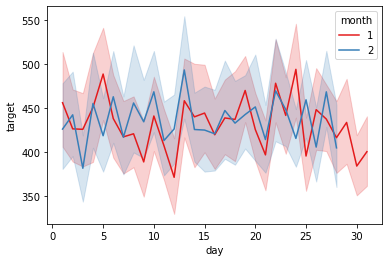

In [54]:
sns.lineplot(x = time.day, y = time.target, hue = time.month, palette = "Set1")

<AxesSubplot:xlabel='week', ylabel='target'>

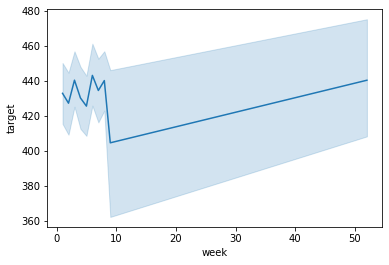

In [55]:
sns.lineplot(x = time.week, y = time.target)

<AxesSubplot:xlabel='day', ylabel='target'>

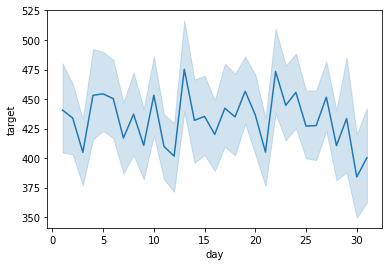

In [56]:
sns.lineplot(x = time.day, y = time.target)

<AxesSubplot:xlabel='month', ylabel='target'>

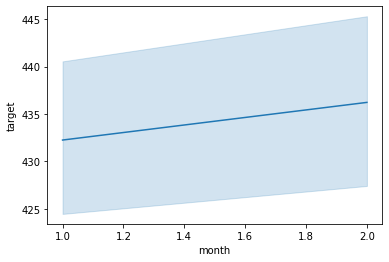

In [57]:
sns.lineplot(x = time.month, y = time.target)